# Pair programming Estadística Descriptiva

## Ejercicios estadística descriptiva

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:

Eres un analista de df que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de df proporcionado.

Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

Instrucciones:


In [6]:
# importamos las librerías que necesitamos

# Tratamiento de df
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
from scipy.stats import shapiro, kstest

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col=0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa



1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo


In [11]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,60.00,58.10,652.23,323.00,32.49,93.00,8.67,149.90,2.30,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,64.50,638.00,0.43,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71
1,105.00,43.10,28.75,9.00,11.78,355.00,4.54,119.05,1.40,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,78.50,15.00,1.12,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17
2,18.00,17.40,NaN,317.00,24.28,213.00,150.01,151.36,2.00,3.02,0.80,0.28,169988236398.00,109.90,51.40,20.10,76.70,112.00,0.95,28.10,1.72,NaN,41.20,37.20,66.10,11.70,NaN,28.03,1.66
3,164.00,40.00,468.00,NaN,7.20,376.00,469.00,NaN,NaN,1.27,34.00,1.51,3154057987.00,106.40,NaN,2.70,NaN,NaN,6.63,36.40,3.33,77.14,NaN,NaN,NaN,NaN,67.87,42.51,1.52
4,26.00,47.50,NaN,117.00,40.73,244.00,34.69,261.73,17.10,5.52,46.30,0.97,94635415870.00,113.50,9.30,51.60,60.80,241.00,0.71,33.40,0.21,NaN,77.50,9.20,49.10,6.89,NaN,-11.20,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.00,24.50,912.05,343.00,17.88,58.00,164.18,NaN,254.90,2.27,52.70,0.00,482359318768.00,97.20,79.30,21.40,72.10,125.00,0.01,45.80,1.92,NaN,59.70,NaN,73.30,8.80,NaN,6.42,-66.59
191,314.00,39.30,331.21,522.00,16.75,84.00,192.67,163.52,2.80,2.05,48.10,0.80,261921244843.00,110.60,28.50,16.50,75.30,43.00,0.73,43.50,0.82,NaN,77.40,19.10,37.60,2.01,NaN,14.06,108.28
192,56.00,44.60,527.97,40.00,30.45,967.00,10.61,157.58,8.10,3.79,1.00,0.92,26914402224.00,93.60,10.20,42.90,66.10,164.00,NaN,81.00,0.31,NaN,38.00,NaN,26.60,12.91,NaN,15.55,48.52
193,25.00,32.10,752.62,16.00,36.19,260.00,5.14,212.31,9.20,4.63,65.20,1.40,23064722446.00,98.70,4.10,40.40,63.50,213.00,0.24,27.50,1.19,NaN,74.60,16.20,15.60,11.43,NaN,-13.13,27.85


In [12]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.00,134.50,157.31,1.26,26.17,83.00,165.50,847.00
agricultural_land,188.00,39.12,21.78,0.60,21.70,39.60,55.38,82.60
land_area,165.00,255.21,258.39,0.00,41.28,148.46,430.00,964.00
armed_forces_size,166.00,103.78,167.16,0.00,10.25,28.50,128.25,936.00
birth_rate,189.00,20.21,9.95,5.90,11.30,17.95,28.75,46.08
calling_code,194.00,360.55,323.24,1.00,82.50,255.50,506.75,1876.00
co2-emissions,183.00,125.92,181.79,1.02,7.60,34.48,185.03,727.97
cpi,175.00,144.19,54.78,99.03,113.67,124.74,155.93,550.93
cpi_change,179.00,6.72,24.45,-4.30,1.00,2.30,4.25,254.90
fertility_rate,188.00,2.70,1.28,0.98,1.71,2.25,3.60,6.91


In [13]:
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia
1,Albania,105.00,AL,43.10,28.75,9.00,11.78,355.00,Tirana,4.54,119.05,1.40,ALL,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,Tirana,78.50,15.00,1.12,Albanian,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17,Europe



2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de df.


In [29]:
densidad = df.groupby("country")["density"].sum()

densidad

country
Afghanistan    60.00
Albania       105.00
Algeria        18.00
Andorra       164.00
Angola         26.00
               ...  
Venezuela      32.00
Vietnam       314.00
Yemen          56.00
Zambia         25.00
Zimbabwe       38.00
Name: density, Length: 195, dtype: float64

In [30]:
max = densidad.idxmax()
max

'Palestinian National Authority'

In [32]:
pop= df.groupby("country")["population"].sum()
pop

country
Afghanistan    0.00
Albania        0.00
Algeria        0.00
Andorra       77.14
Angola         0.00
               ... 
Venezuela      0.00
Vietnam        0.00
Yemen          0.00
Zambia         0.00
Zimbabwe       0.00
Name: population, Length: 195, dtype: float64

In [33]:
min = pop.idxmin()
min

'Afghanistan'


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de df.


In [35]:
totalidad = df.groupby("country")["birth_rate"].mean().reset_index()
totalidad

,country,birth_rate
0,Afghanistan,32.49
1,Albania,11.78
2,Algeria,24.28
3,Andorra,7.20
4,Angola,40.73
...,...,...
190,Venezuela,17.88
191,Vietnam,16.75
192,Yemen,30.45
193,Zambia,36.19



4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.


In [36]:
df["infant_mortality"].value_counts()

3.60     4
3.10     4
6.10     4
9.80     3
2.70     3
        ..
39.10    1
31.30    1
62.60    1
11.80    1
33.90    1
Name: infant_mortality, Length: 144, dtype: int64

In [38]:
media_mortalidad = df['infant_mortality'].mean()
mediana_mortalidad = df['infant_mortality'].median()
desviacion_estandar_mortalidad = df['infant_mortality'].std()

# Definir umbrales para las categorías
umbral_bajo = mediana_mortalidad - desviacion_estandar_mortalidad
umbral_alto = mediana_mortalidad + desviacion_estandar_mortalidad

# Función para asignar categorías
def asignar_categoria(mortalidad):
    if mortalidad <= umbral_bajo:
        return 'Baja'
    elif mortalidad <= umbral_alto:
        return 'Moderada'
    else:
        return 'Alta'

# Aplicar la función para asignar categorías
df['categoria_mortalidad_infantil'] = df['infant_mortality'].apply(asignar_categoria)

# Mostrar los resultados
(df[['country', 'infant_mortality', 'categoria_mortalidad_infantil']])

,country,infant_mortality,categoria_mortalidad_infantil
0,Afghanistan,47.90,Alta
1,Albania,7.80,Moderada
2,Algeria,20.10,Moderada
3,Andorra,2.70,Moderada
4,Angola,51.60,Alta
...,...,...,...
190,Venezuela,21.40,Moderada
191,Vietnam,16.50,Moderada
192,Yemen,42.90,Alta
193,Zambia,40.40,Alta


In [39]:
from itertools import combinations


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación


In [44]:
corr_fer_life = df["fertility_rate"].corr(df["life_expectancy"],method= "spearman") 
corr_fer_life

# Correlacion negativa, mientras la tasa de fertilidad aumenta, la esperanza de vida disminuye. 
# Cuando una variable aumenta, la otra tiende a disminuir. 
# Indica una correlación negativa fuerte. Esto significa que cuando una variable sube, la otra tiende a bajar de manera consistente.

-0.8430472266451204


6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.


In [54]:
df["cpi"].mean()

144.19360000000003

In [55]:
df["cpi"].median()

124.74

Text(0.5, 0, 'CPI')

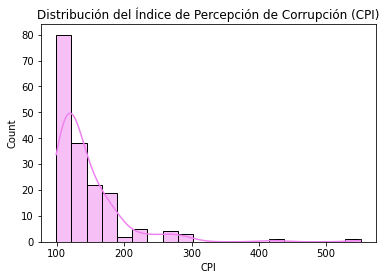

In [53]:
sns.histplot(data = df["cpi"], 
             color = "violet", 
             kde = True, 
             bins = 20 )
plt.title('Distribución del Índice de Percepción de Corrupción (CPI)')
plt.xlabel('CPI')



7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).



8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.



9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.